In [2]:
#Audio data from https://www.soundsnap.com/search/audio/hunting%20rifle/score
# https://soundbible.com/tags-gun.html
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [3]:
# Audio data analysis
y, sr = librosa.load(path="../Dataset/Train_dataset/environment/Elephant_African_Growling.wav", sr=44100, duration=15)
Audio(data=y,rate=sr)

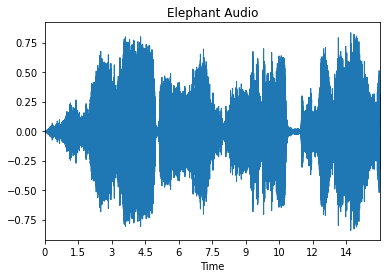

In [4]:
fig, ax = plt.subplots()
librosa.display.waveplot(y, sr=sr, ax=ax)
ax.set(title='Elephant Audio')
ax.label_outer()

/home/sachin/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/sachin/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/sachin/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


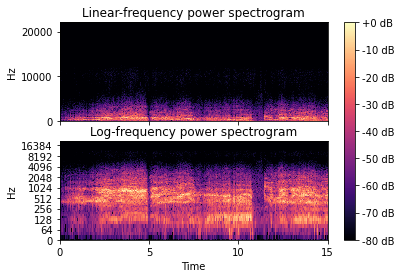

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, hop_length=hop_length, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

### Spectral Centorid

[Text(0.5, 1.0, 'Log Power spectrogram')]

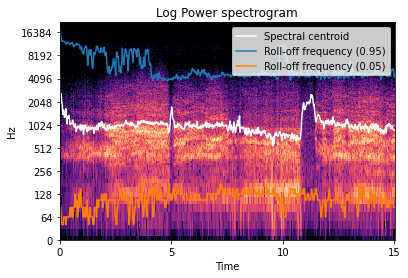

In [6]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
times = librosa.times_like(cent)

rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
fig, ax = plt.subplots()
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.plot(librosa.times_like(rolloff_max), rolloff_max[0], label='Roll-off frequency (0.95)')
ax.plot(librosa.times_like(rolloff_min), rolloff_min[0], label='Roll-off frequency (0.05)')
ax.legend(loc='upper right')
ax.set(title='Log Power spectrogram')

### MFCC

[Text(0.5, 1.0, 'MFCC')]

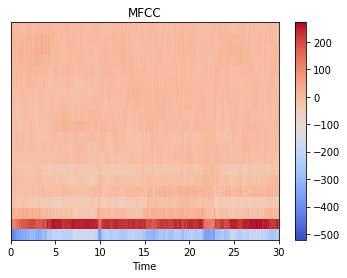

In [7]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

### Onset Detection

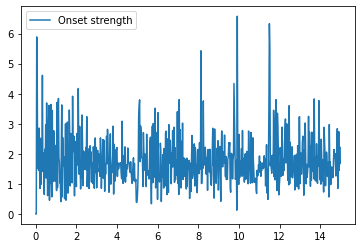

In [8]:
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots()
ax.plot(times, oenv, label='Onset strength')
ax.label_outer()
ax.legend(frameon=True)

### Zero Crossing Rate

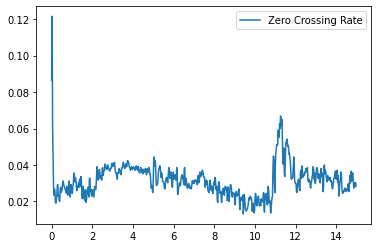

In [9]:
zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length)
times = librosa.times_like(zcr, sr=sr, hop_length=hop_length)
fig, ax = plt.subplots()
ax.plot(times, zcr[0], label='Zero Crossing Rate')
ax.label_outer()
ax.legend(frameon=True)